> 权力的游戏全季人物关系的复杂网络分析

# 加载数据
数据来自[Network Data for the Series](https://github.com/mathbeveridge/gameofthrones)

处理每个`edges.csv`文件，得到全八季的人物同时登场次数表

In [88]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("../data/gameofthrones/data_processed/all_edges.csv")

In [3]:
data

,Source,Target,Weight
0,NED,ROBERT,211.0
1,DAENERYS,JORAH,594.0
2,JON,SAM,415.0
3,LITTLEFINGER,NED,118.0
4,NED,VARYS,104.0
...,...,...,...
2636,TYRION,VALE_LORD,2.0
2637,VALE_LORD,MAESTER_WOLKAN,2.0
2638,VALE_LORD,YARA,2.0
2639,VALE_LORD,YOHN_ROYCE,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  2641 non-null   object 
 1   Target  2641 non-null   object 
 2   Weight  2641 non-null   float64
dtypes: float64(1), object(2)
memory usage: 62.0+ KB


In [5]:
number_characters = len(set(data["Source"].unique()) | set(data["Target"].unique()))
number_characters

407

In [6]:
len(set(data["Source"].unique()) & set(data["Target"].unique()))

261

* 数据共2641条记录
* 全季共407名角色

# 建立图

In [7]:
characters = list(set(data["Source"].unique()) | set(data["Target"].unique()))

In [8]:
G = nx.Graph()

In [9]:
G.add_nodes_from(characters)

In [10]:
for i in range(len(data)):
    G.add_edge(data.loc[i, "Source"], data.loc[i, "Target"], weight=data.loc[i, "Weight"])

# 节点度

In [15]:
degree = [G.degree(c) for c in characters]
degree = pd.DataFrame({"character": characters, "degree_value": degree})
degree.sort_values(by=["degree_value"], ascending=False, inplace=True)
degree

,character,degree_value
175,TYRION,128
351,JON,105
85,SANSA,101
89,ARYA,97
386,DAENERYS,93
...,...,...
117,MERRY,1
113,GATINS,1
109,IROGENIA,1
107,MUSICIAN,1


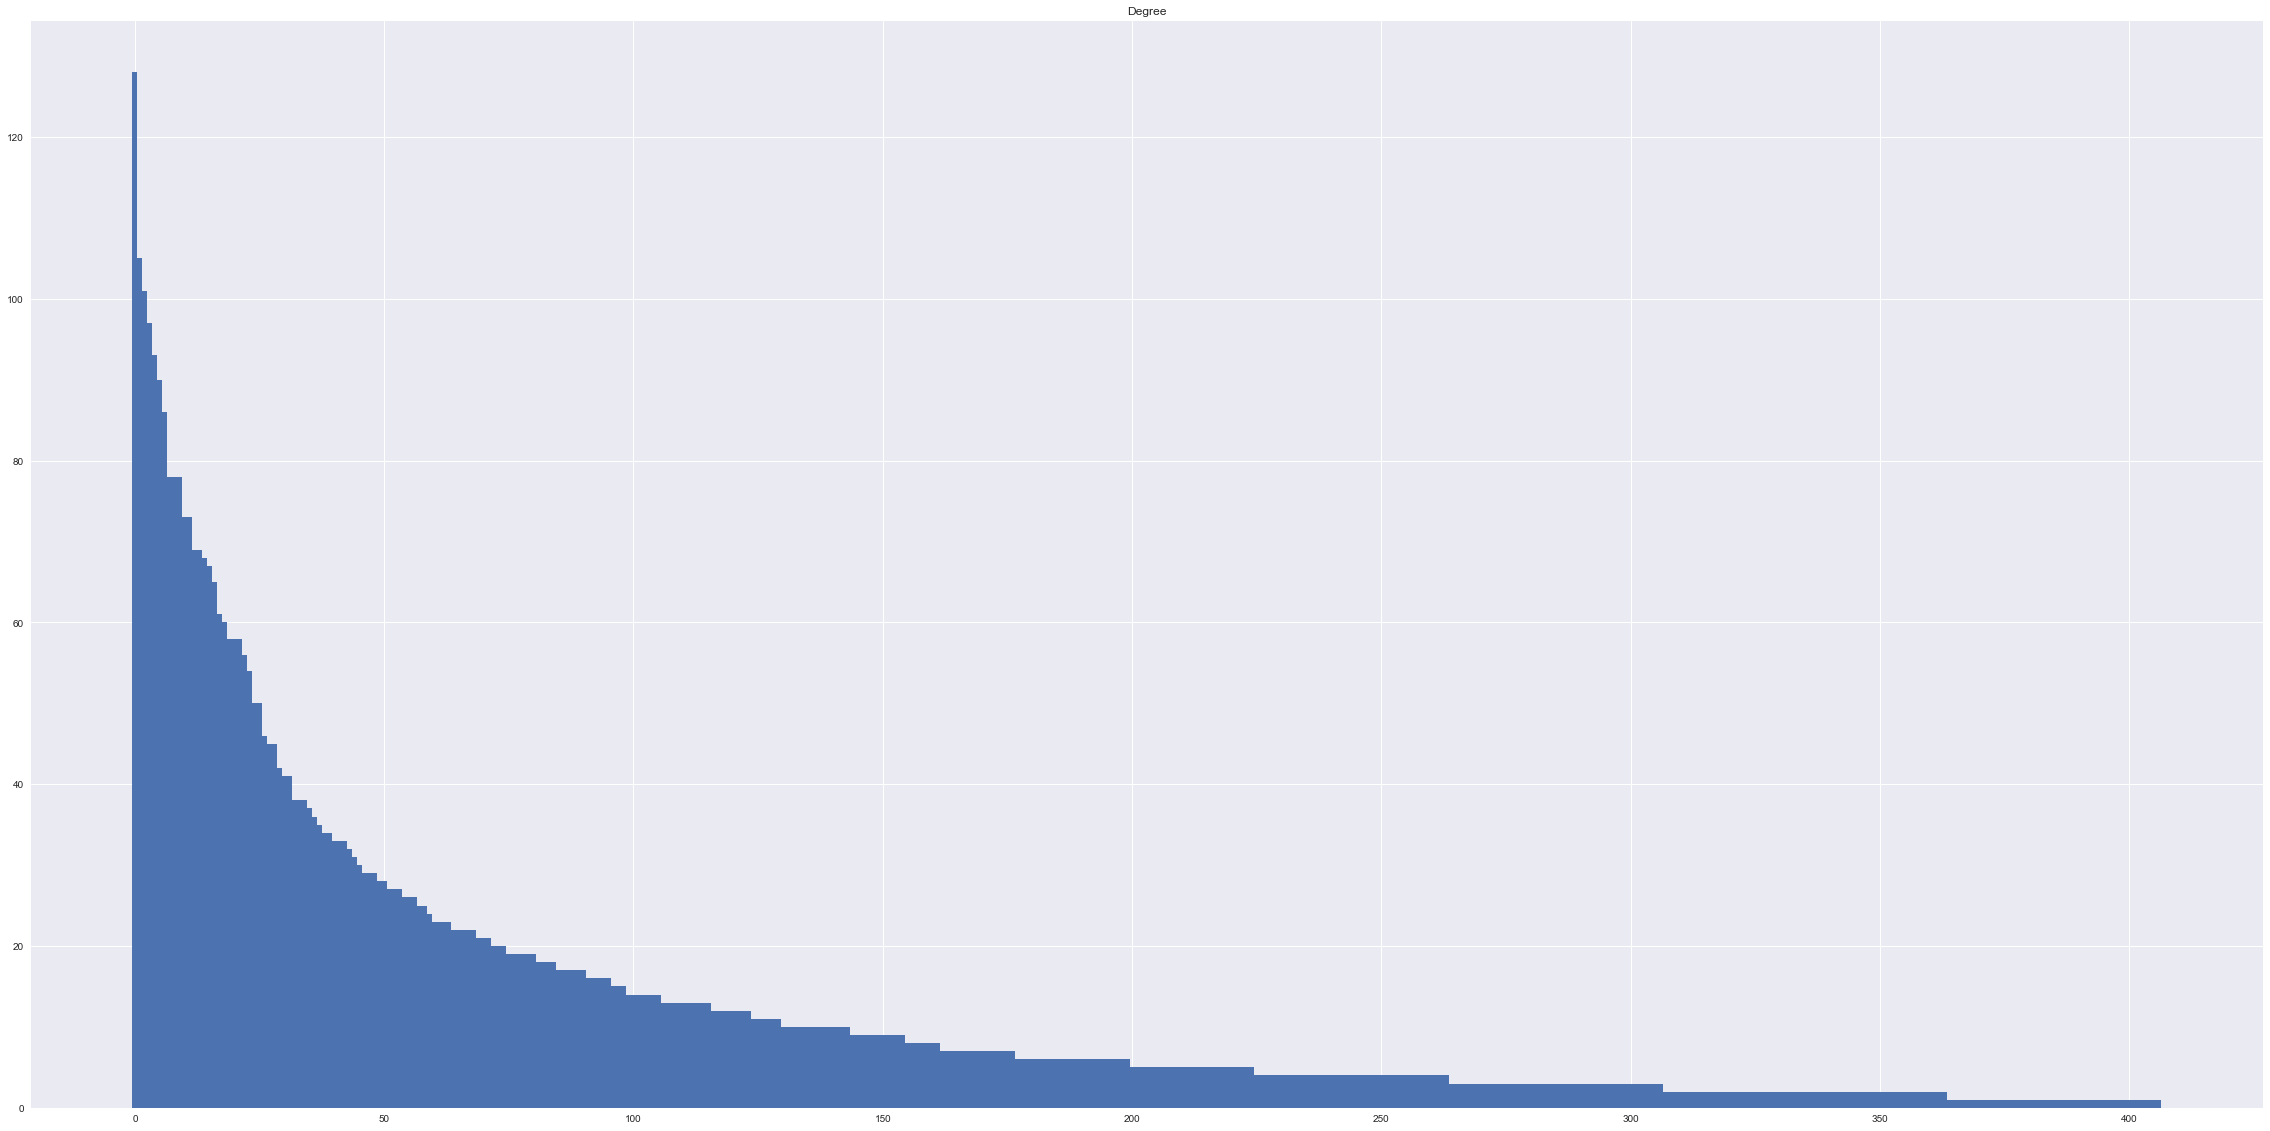

In [28]:
plt.figure(figsize=(40, 20))
plt.bar(range(len(degree)), degree["degree_value"], width=1);
plt.title("Degree");

In [29]:
degree["degree_value"].mean()

12.958230958230958

In [46]:
len(degree[degree["degree_value"] > degree["degree_value"].mean()])

116

In [30]:
degree.head(7)

,character,degree_value
175,TYRION,128
351,JON,105
85,SANSA,101
89,ARYA,97
386,DAENERYS,93
185,JAIME,90
9,CERSEI,86


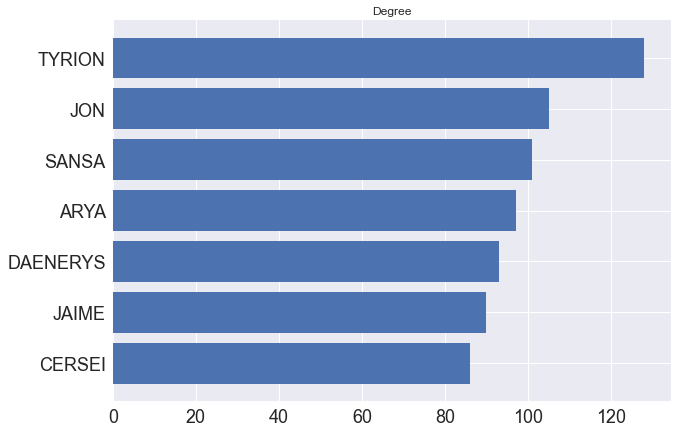

In [45]:
plt.figure(figsize=(10, 7))
plt.barh(degree["character"][6::-1], degree["degree_value"][6::-1]);
plt.title("Degree");
plt.tick_params(labelsize=18)

* 平均度为12.96
* 116位角色的度在平均值之上
* 度前三的角色是Tyrion, Jon, Snasa

# 加权度

即角色的登场次数

In [47]:
character_n = [sum([G[c][x]["weight"] for x in list(G[c])]) for c in characters]
weighted_degree = pd.DataFrame({"character": characters, "value": character_n})
weighted_degree = weighted_degree.sort_values(by=["value"], ascending=False)
weighted_degree

,character,value
175,TYRION,5875.0
351,JON,4753.0
386,DAENERYS,3839.0
9,CERSEI,3727.0
85,SANSA,3607.0
...,...,...
159,MAGNAR,2.0
149,RENNICK,2.0
377,MINISA,2.0
378,BRIAN,2.0


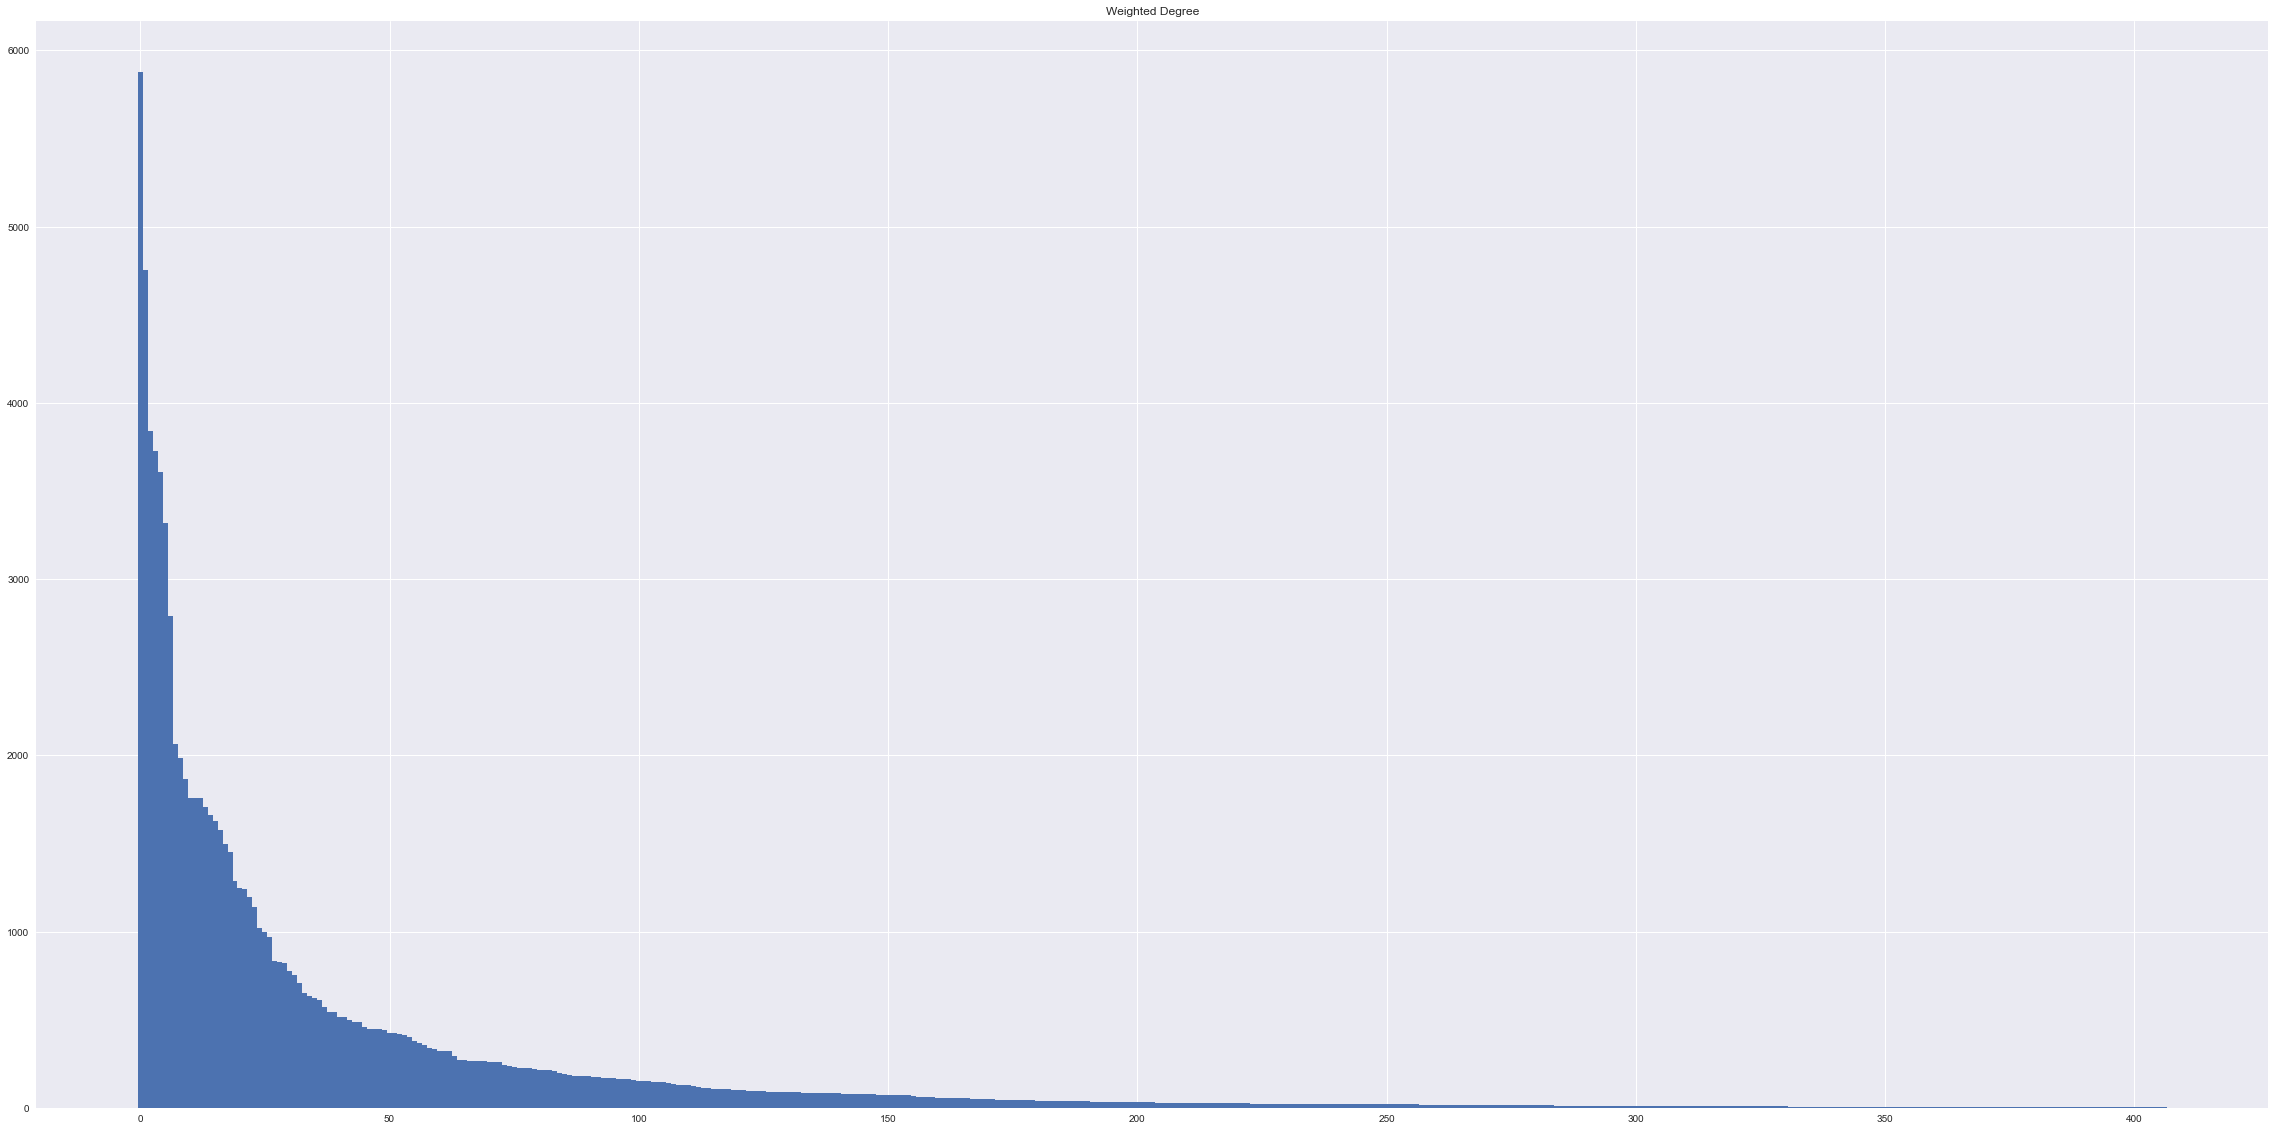

In [49]:
plt.figure(figsize=(40, 20))
plt.bar(range(len(weighted_degree)), weighted_degree["value"], width=1);
plt.title("Weighted Degree");

In [50]:
weighted_degree["value"].mean()

231.67076167076166

In [52]:
len(weighted_degree[weighted_degree["value"] > weighted_degree["value"].mean()])

76

In [53]:
weighted_degree.head(7)

,character,value
175,TYRION,5875.0
351,JON,4753.0
386,DAENERYS,3839.0
9,CERSEI,3727.0
85,SANSA,3607.0
185,JAIME,3316.0
89,ARYA,2791.0


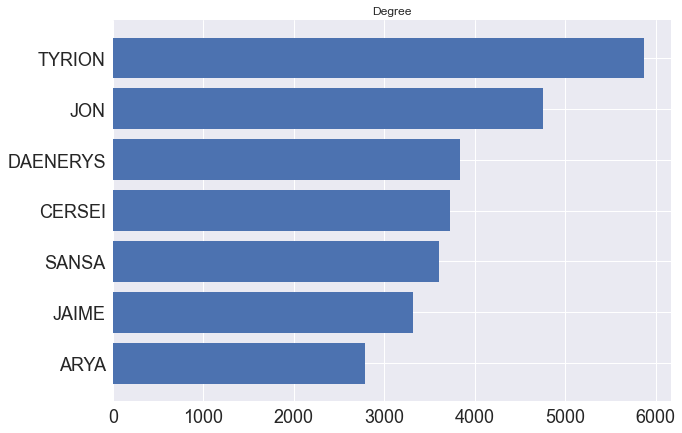

In [54]:
plt.figure(figsize=(10, 7))
plt.barh(weighted_degree["character"][6::-1], weighted_degree["value"][6::-1]);
plt.title("Degree");
plt.tick_params(labelsize=18)

* 平均加权度为231.67
* 在平均值之上的角色有76位
* 前三为Tyrion, Jon, Daenerys

# *Eigenvector(特征向量中心性)*

In [74]:
def CentralityFun(fun):
    global G
    centrality = fun(G)
    centrality = pd.DataFrame({"character": centrality.keys(), "value": centrality.values()})
    centrality.sort_values(by=["value"], ascending=False, inplace=True)
    print(centrality.head(7))
    
    plt.figure(figsize=(10, 7))
    plt.barh(centrality["character"][6::-1], centrality["value"][6::-1]);
    plt.title(fun.__name__);
    plt.tick_params(labelsize=18)

    character     value
175    TYRION  0.216157
85      SANSA  0.204321
185     JAIME  0.185146
351       JON  0.182252
89       ARYA  0.172871
284     VARYS  0.170023
9      CERSEI  0.168134


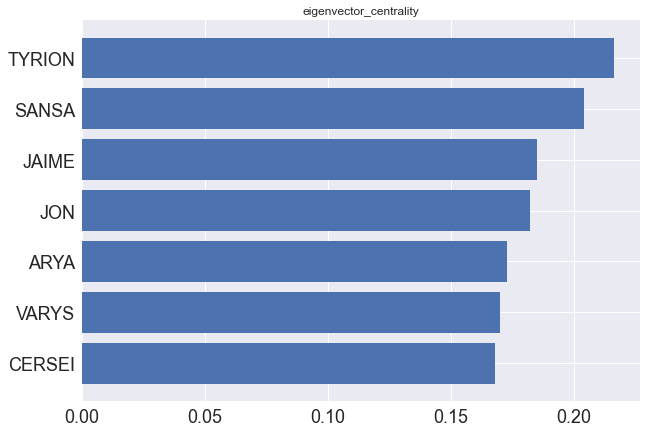

In [76]:
CentralityFun(nx.eigenvector_centrality)

# *PageRank*

    character     value
175    TYRION  0.049108
351       JON  0.041325
386  DAENERYS  0.036950
9      CERSEI  0.029648
85      SANSA  0.029610
89       ARYA  0.027460
185     JAIME  0.027400


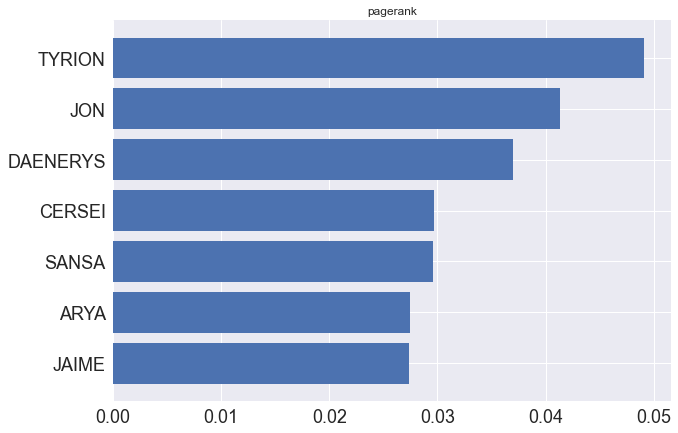

In [77]:
CentralityFun(nx.pagerank)

# *Betweenness(介性中心性)*

    character     value
175    TYRION  0.133629
386  DAENERYS  0.111988
89       ARYA  0.101593
351       JON  0.095340
246     THEON  0.064599
85      SANSA  0.056738
365       SAM  0.056663


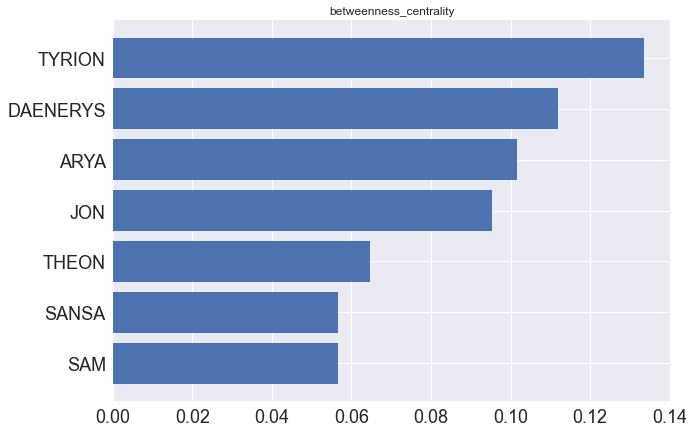

In [73]:
CentralityFun(nx.betweenness_centrality)

# 平均路径长度和网络直径

In [81]:
spl = list(nx.all_pairs_shortest_path_length(G))

In [83]:
import functools
spl = list(nx.all_pairs_shortest_path_length(G))
spl = functools.reduce(lambda x, y: list(x) + list(y), [y[1].values() for y in [x for x in spl]])

In [84]:
import collections
counter = collections.Counter(spl)
del counter[0]

In [85]:
counter

Counter({1: 5274, 2: 56614, 3: 85728, 4: 14708, 5: 492, 6: 2})

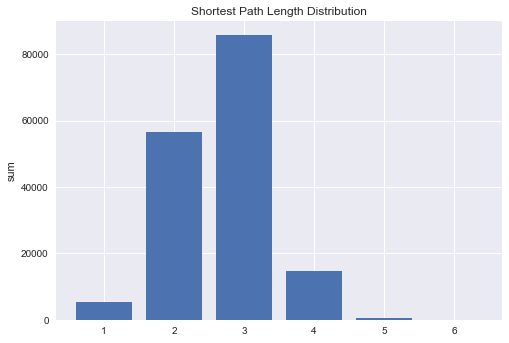

In [89]:
plt.figure()
plt.bar(counter.keys(), counter.values());
plt.title("Shortest Path Length Distribution")
plt.ylabel("sum");

但是上述分析其实不准确

In [90]:
G.is_directed()

False

因为图不连通!

![](../images/what.png)

In [91]:
G2 = G.copy()
G2.remove_nodes_from(["MULLY", "BLACK_JACK", "KEGS"])

In [95]:
nx.diameter(G2)

6

In [96]:
nx.average_shortest_path_length(G2)

2.683979067881974

* 最短路径长平均值为2.68
* 网络直径为6

#  聚类系数

               character  value
156               RHAEGO    1.0
236        GUARD_CAPTAIN    1.0
100      LHAZAREEN_WOMAN    1.0
235     LOMMY_GREENHANDS    1.0
234        MEEREEN_SLAVE    1.0
104  DOSH_KHALEEN_LEADER    1.0
229                MALKO    1.0


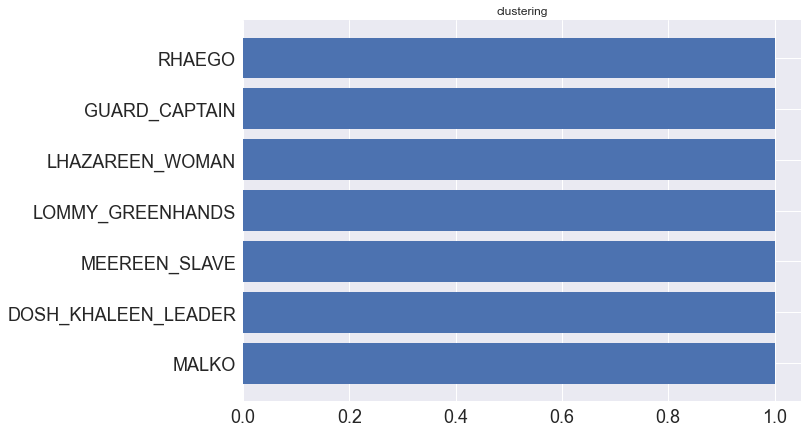

In [97]:
CentralityFun(nx.clustering)

In [98]:
nx.average_clustering(G)

0.6616442169776453

* 平均聚类系数为0.66

# 图的绘制

## 社区划分

In [104]:
from networkx.algorithms.community import k_clique_communities
klist = list(k_clique_communities(G, 5))

In [139]:
len(klist)

6

## 绘制

这里把根据节点的度绘制节点的大小和字体大小

In [170]:
degree2 = {c: G2.degree(c) for c in G2.nodes}
degree2_mean = np.mean(list(degree2.values()))
degree2 = {c: np.ceil(degree2[c] / degree2_mean) for c in degree2}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

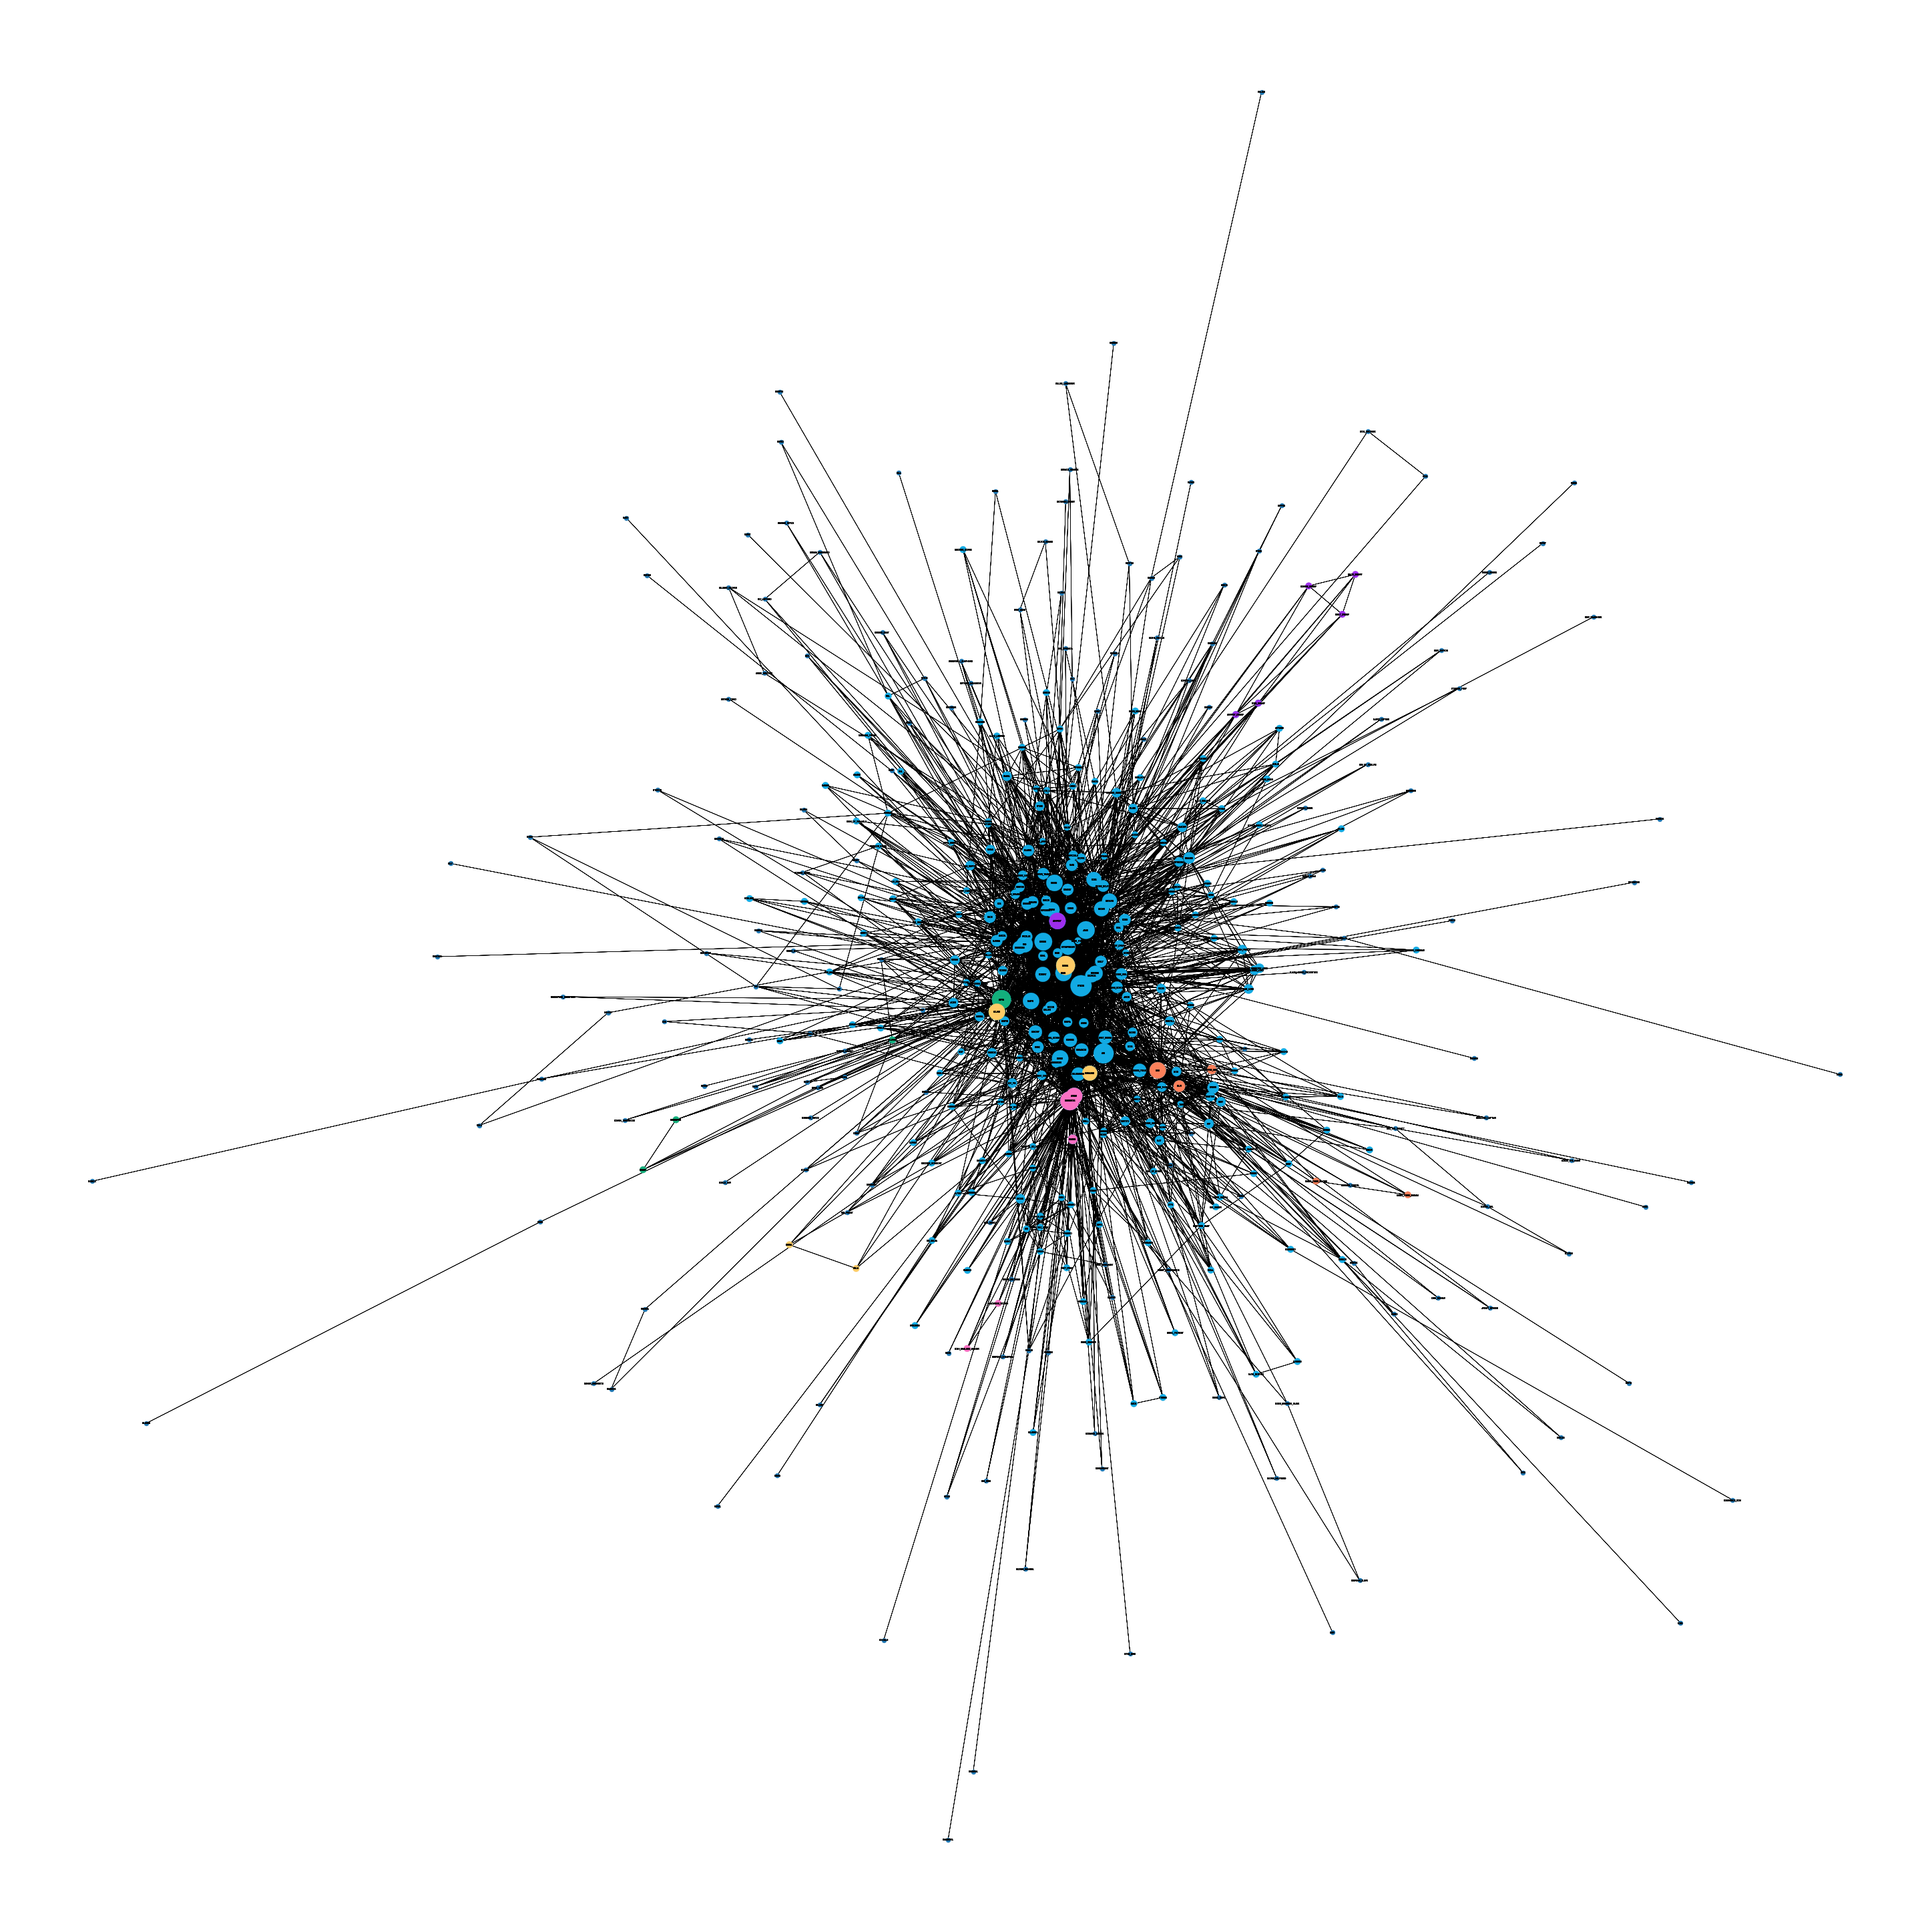

In [187]:
plt.figure(figsize=(40, 40))
pos = nx.spring_layout(G2)
options = {
    "width": 0.5,
    "with_labels": True,
    "font_size" : 3
}
color = ["r", "g", "b", "y" , "c", "m"]
nx.draw(G2, pos=pos, node_size=50, **options);
for i, nodelist in enumerate(klist):
    sizelist = [degree2[c] for c in nodelist]
    nodesize = list(map(lambda x: x * 100, sizelist))
    nx.draw(G2, pos=pos, nodelist=nodelist, 
            node_color=colors[i],
            node_size=nodesize, **options);